In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.ensemble import AdaBoostClassifier#adaboost引入方法
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles#造数据

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
## 创建数据
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)#创建符合高斯分布的数据集
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

In [4]:
#构建adaboost模型
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",#可以不写
                         n_estimators=200)
#数据量大的时候，可以增加内部分类器的树深度，也可以不限制树深
#max_depth树深，数据量大的时候，一般范围在10——100之间
#数据量小的时候，一般可以设置树深度较小，或者n_estimators较小
#n_estimators 迭代次数或者最大弱分类器数：200次
#base_estimator：DecisionTreeClassifier 选择弱分类器，默认为CART树
#algorithm：SAMME 和SAMME.R 。运算规则，后者是优化算法，以概率调整权重，迭代速度快，
#需要能计算概率的分类器支持
#learning_rate：0<v<=1，默认为1，正则项 衰减指数
#loss：linear、‘square’exponential’。误差计算公式：一般用linear足够
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [5]:
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#预测
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
#设置维度
Z = Z.reshape(xx.shape)

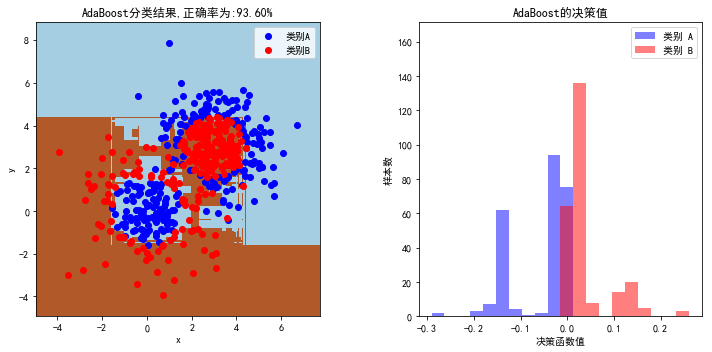

In [6]:
## 画图
plot_colors = "br"
class_names = "AB"

plt.figure(figsize=(10, 5), facecolor='w')
#局部子图
plt.subplot(121)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired) 
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label=u"类别%s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title(u'AdaBoost分类结果,正确率为:%.2f%%' % (bdt.score(X, y) * 100))

#获取决策函数的数值
twoclass_output = bdt.decision_function(X)
#获取范围
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
#直方图
    plt.hist(twoclass_output[y == i],
             bins=20,
             range=plot_range,
             facecolor=c,
             label=u'类别 %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel(u'样本数')
plt.xlabel(u'决策函数值')
plt.title(u'AdaBoost的决策值')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()